<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW2_GD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

### Решения

#### a) $f(x) = x^2 - 30x + 1$

Производная: $f'(x)=2x-30$

Критические точки, где $f'(x)=0$: $2x-30=0 \implies x=15$

Тип экстремума определим по 2-й производной: $f''(x)=2$

Так как $f''(15)>0$, то $x=15$ - точка минимума

$f(15)=15^2-30\cdot15+1=221$

#### b) $g(x) = -x^3 + 5x - 7x^2 + 17$

Производная: $g'(x)=-3x^2+5-14x$

Критические точки - корни уравнения: $-3x^2-14x+5 = 0$

$D = b^2 - 4ac = (-14)^2 - 4(-3)(5) = 196 + 60 = 256$

$x_{1,2} = \frac{-b \pm \sqrt{D}}{2a} = \frac{14 \pm 16}{-6}$

Находим корни: $x_1 = \frac{30}{-6} = -5, \quad x_2 = \frac{-2}{-6} = \frac{1}{3}$

Тип экстремума через 2-ю производную: $g''(x) = -6x-14$

Для $x_1=-5$,  $g''(-5) = 30-14 = 16 > 0$ - локальный минимум $g(x_1)=-(-5)^3-7(-5)^2+5\cdot(-5)+17= -58$

Для $x_2=\frac{1}{3}$,  $g''(\frac{1}{3}) = -2-14 = -16 < 0$ - локальный максимум $g(x_2)=-\frac{1}{3}^3-7\cdot\frac{1}{3}^2+5\cdot\frac{1}{3}+17= 17\frac{23}{27}$


#### c) $h(x) = x^2 - 1/x$

Очевидно, что ф-я не определена в точке 0.

Производная: $h'(x) = 2x+x^{-2}$ для любого $x \neq 0$.

$2x+x^{-2} = 0$ (домножим на $x^2$) $\implies 2x^3+1=0 \implies x^3=-2^{-1} \implies x_0 = -2^{-1/3}$ (извиняюсь за степени, но так запись без 3-этажных дробей)

2-я производная: $h''(x) = 2-2x^{-3}$

$h''(x_0)=2-2(-2^{-1/3})^{-3} = 2 - 2 \cdot (-2) = 6 > 0 \implies$  локальный минимум в области $x<0$.

$h(x_0) = (-2^{-1/3})^2 - (-2^{-1/3})^{-1} = 4^{-1/3} + 2^{1/3} \approx 1.88988$

В области $x>0$ производная $h'(x) > 0$ и ф-я монотонно возрастает.

#### d) $j(x) = 1/x^5 + x^{17} + 8$

Ф-я неопределена в точке 0.

Производная: $j'(x) = 17x^{16} - 5x^{-6}$ 

Критические точки: $j'(x)=0 \implies \frac{17x^{22}-5}{x^6}=0 \implies x^{22} = \frac{5}{17} \implies x_{1,2}= ±(\frac{5}{17})^{1/22}$

2-я производная: $j''(x) = 272x^{15} + 30x^{-7} = \frac{272x^{22} + 30}{x^7}$

Проверим $j''(x_{1,2})= \frac{272 \cdot \frac{5}{17} + 30}{±(\frac{5}{17})^{7/22}} = ±110 \cdot (\frac{5}{17})^{-7/22}$

$x_1 > 0 \implies j''(x_1) > 0 \implies x_1$ - локальный минимум.

$x_2 < 0 \implies j''(x_2) < 0 \implies x_2$ - локальный максимум.


In [111]:
j.evalf(subs={x: crit_points_j[1]}), j.evalf(subs={x: (5./17.)**(1./22.)})

(9.70908799027152, 9.70908799027152)

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [32]:
# your code here
import sympy as sp

x = sp.Symbol('x', real=True)  # Будем решать только в вещественных числах


In [112]:
# Находим 1 и 2 производные, критические точки и точки перегиба (все понадобится ниже)
def double_diff(func, real_only=True):
    # Первая производная
    func_diff = sp.diff(func, x)
    crit_points = sp.solve(func_diff, x)

    # Вторая производная
    func_diff2 = sp.diff(func_diff, x)
    bend_points = sp.solve(func_diff2, x)
    
    if real_only:
        crit_points = [p for p in crit_points if p.is_real]
        bend_points = [p for p in bend_points if p.is_real]
    return func_diff, crit_points, func_diff2, bend_points

In [88]:
# Функция a: f(x) = x^2 - 30x + 1
f = x**2 - 30*x + 1

f_diff, crit_points_f, f_diff2, bend_points_f = double_diff(f) 

print("Экстремумы функции f(x):")
for point in crit_points_f:
    print(f"Критическая точка: {point}, Вторая производная: {f_diff2.subs(x, point)}")

Экстремумы функции f(x):
Критическая точка: 15, Вторая производная: 2


In [89]:
# Функция b: g(x) = -x^3 + 5x - 7x^2 + 17
g = -x**3 + 5*x - 7*x**2 + 17

g_diff, crit_points_g, g_diff2, bend_points_g = double_diff(g)

print("\nЭкстремумы функции g(x):")
for point in crit_points_g:
    print(f"Критическая точка: {point}, Вторая производная: {g_diff2.subs(x, point)}")


Экстремумы функции g(x):
Критическая точка: -5, Вторая производная: 16
Критическая точка: 1/3, Вторая производная: -16


In [90]:
# Функция c: h(x) = x^2 - 1/x
h = x**2 - (1/x)
h_diff, crit_points_h, h_diff2, bend_points_h = double_diff(h)

print("\nЭкстремумы функции h(x):")
for point in crit_points_h:
    print(f"Критическая точка: {point}, Вторая производная: {h_diff2.subs(x, point)}")


Экстремумы функции h(x):
Критическая точка: -2**(2/3)/2, Вторая производная: 6


In [113]:
# Функция d: j(x) = 1/x^5 + x^17 + 8
j = (1/x**5) + x**17 + 8
j_diff, crit_points_j, j_diff2, bend_points_j = double_diff(j)

print("\nЭкстремумы функции j(x):")
for point in crit_points_j:
    print(f"Критическая точка: {point}, Вторая производная: {j_diff2.subs(x, point)}")


Экстремумы функции j(x):
Критическая точка: -17**(21/22)*5**(1/22)/17, Вторая производная: -22*17**(7/22)*5**(15/22)
Критическая точка: 17**(21/22)*5**(1/22)/17, Вторая производная: 22*17**(7/22)*5**(15/22)


In [114]:
17**(21/22)*5**(1/22)/17

0.9458926861215569

## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

a) Функция $f(x) = x^2 - 30x + 1$ не имеет перегибов, т.к. $f''(x) = 2 > 0$.

b) $g(x) = -x^3 + 5x - 7x^2 + 17$ имеет перегибы, т.к. $\exists x_0 \in \mathbb{R} g''(x_0) = 0$.

$g''(x) = -6x-14=0 \implies -6x-14=0 \implies x_0 = -\frac{14}{6} = -\frac{7}{3} \approx -2.(3)$

c) $h(x) = x^2-\frac{1}{x}$ имеет перегибы, т.к. $\exists x_0 \in \mathbb{R} h''(x_0) = 0$.

$h''(x)=2-2x^{-3}=0 \implies \frac{2x^3-2}{x^3}=0 \implies 2x^3-2=0 \implies x^3=1 \implies x_0=1$

d) $j(x) = 1/x^5 + x^{17} + 8$ не имеет перегибов, т.к. $j''(x) = \frac{272x^{22} + 30}{x^7} \ne 0$

Доказательство: Если $j''(x) = 0 \iff 272x^{22} + 30 = 0 \implies x^{22}=-\frac{30}{272}<0$ что невозможно в действительных числах.



## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [ ]:
# уже нашли - см ф-цию выше.

print("Точки перегиба функции f(x):")
if len(bend_points_f) == 0:
    print("Точки перегиба не найдены.")
else:
    for point in bend_points_f:
        print(f"Точка перегиба: {point}")

print("\nТочки перегиба функции g(x):")
if len(bend_points_g) == 0:
    print("Точки перегиба не найдены.")
else:
    for point in bend_points_g:
        print(f"Точка перегиба: {point}")


print("\nТочки перегиба функции h(x):")
if len(bend_points_h) == 0:
    print("Точки перегиба не найдены.")
else:
    for point in bend_points_h:
        print(f"Точка перегиба: {point}")

print("\nТочки перегиба функции j(x):")
if len(bend_points_j) == 0:
    print("Точки перегиба не найдены.")
else:
    for point in bend_points_j:
        print(f"Точка перегиба: {point}")

Точки перегиба функции f(x):
Точки перегиба не найдены.

Точки перегиба функции g(x):
Точка перегиба: -7/3

Точки перегиба функции h(x):
Точка перегиба: 1

Точки перегиба функции j(x):
Точки перегиба не найдены.


### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

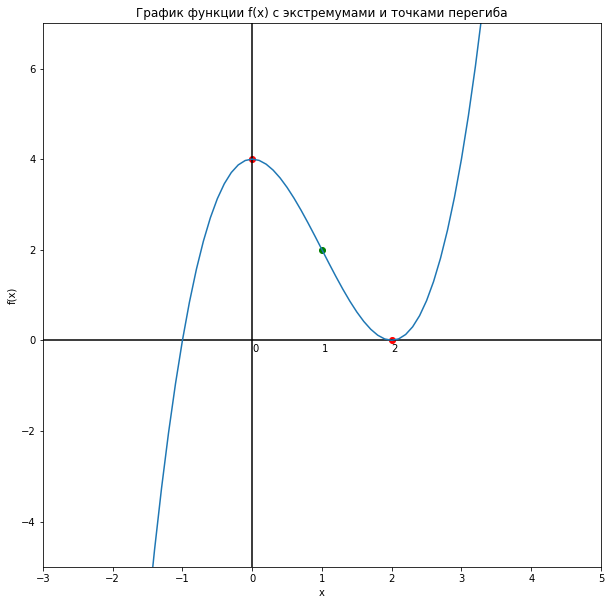

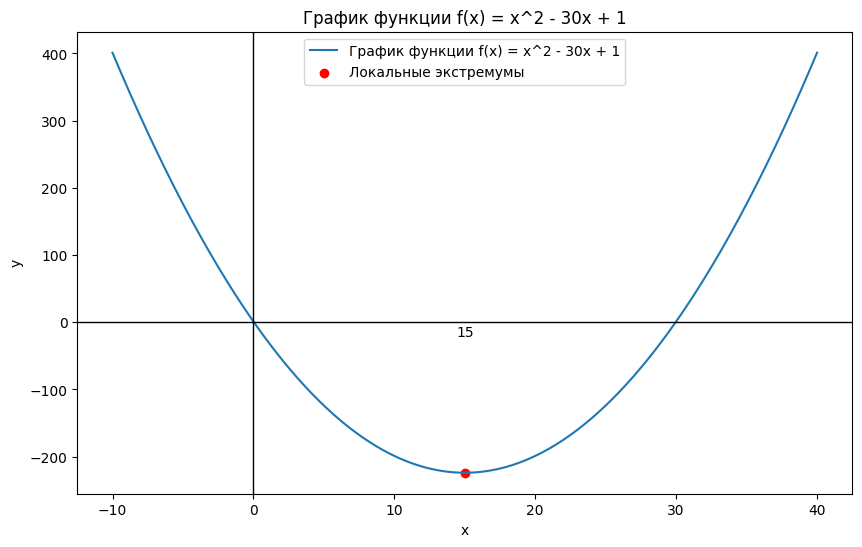

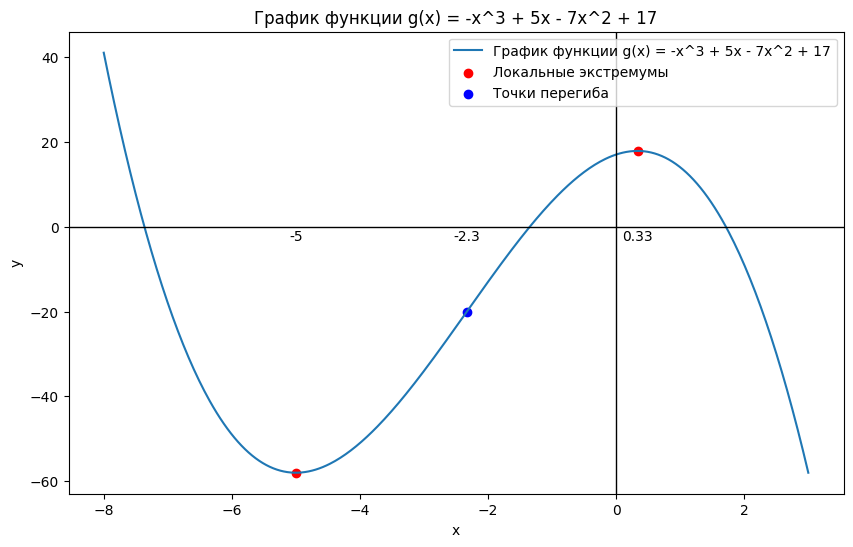

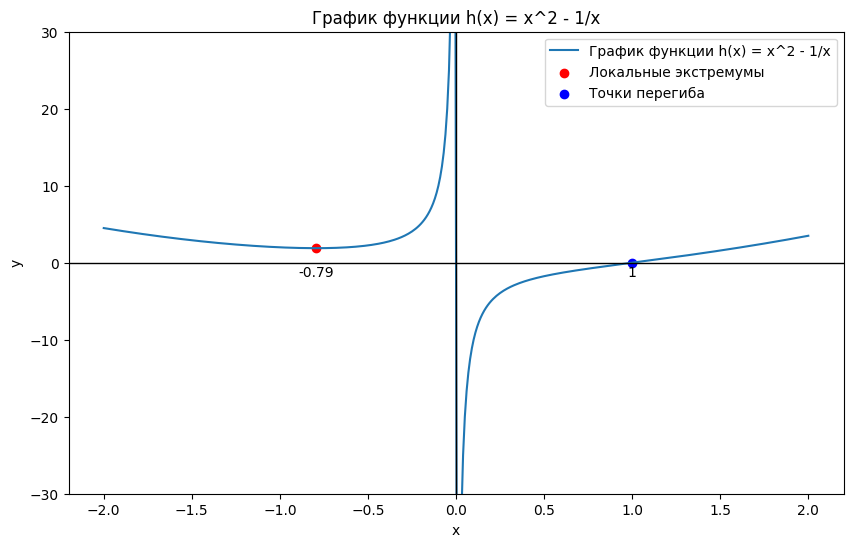

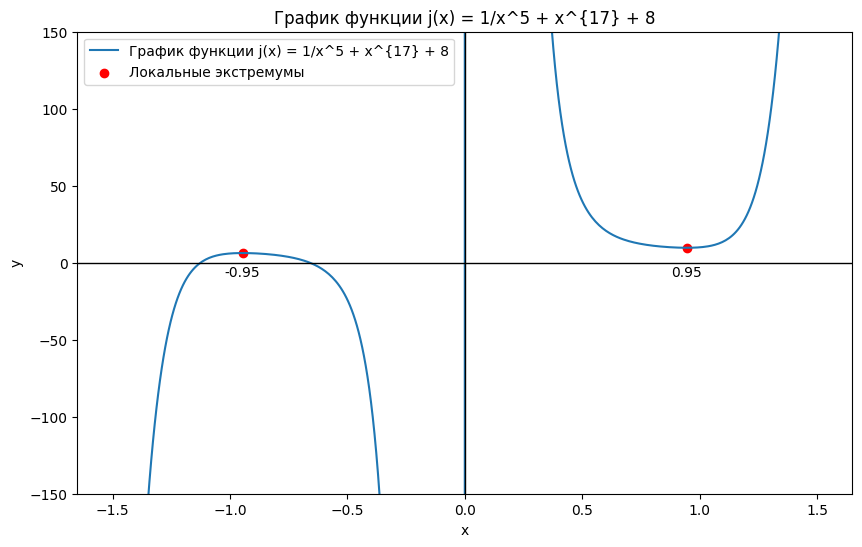

In [ ]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

# Экстреммумы и критические точки уже получены выше


# Преобразуем критические точки в числовые значения для графиков
crit_points_f = [float(point) for point in crit_points_f]
crit_points_g = [float(point) for point in crit_points_g]
crit_points_h = [float(point) for point in crit_points_h]
crit_points_j = [float(point) for point in crit_points_j]

bend_points_f = [float(point) for point in bend_points_f]
bend_points_g = [float(point) for point in bend_points_g]
bend_points_h = [float(point) for point in bend_points_h]
bend_points_j = [float(point) for point in bend_points_j]


# Создаем диапазон значений для графиков
x_vals_f = np.linspace(-10, 40, 400)
x_vals_g = np.linspace(-8, 3, 400)
x_vals_h = [*np.linspace(-2, -0.01, 200), *np.linspace(0.01, 2, 200)]  # Избегаем деления на ноль
x_vals_j = [*np.linspace(-1.5, -0.01, 200), *np.linspace(0.01, 1.5, 200)]  # Избегаем деления на ноль

# Функция для построения графиков
def plot_function(func, x_vals, crits, bends, title, y_limits=None):
    y_vals = [func.evalf(subs={x: val}) for val in x_vals]
    
    plt.figure(figsize=(10, 6), frameon=False)
    plt.plot(x_vals, y_vals, label=title)

    # Отметка локальных экстремумов
    if crits:
        plt.scatter(crits, [func.evalf(subs={x: point}) for point in crits], color='red', label='Локальные экстремумы')
        for point in crits:
            plt.annotate(f'{point:.2g}', (point, 0), textcoords="offset points", xytext=(0,-10), ha='center')

    # Отметка точек перегиба
    if bends:
        plt.scatter(bends, [func.evalf(subs={x: point}) for point in bends], color='blue', label='Точки перегиба')
        for point in bends:
            plt.annotate(f'{point:.2g}', (point, 0), textcoords="offset points", xytext=(0,-10), ha='center')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.axhline(0, color='black', lw=1, ls='-')
    plt.axvline(0, color='black', lw=1, ls='-')
    if y_limits:
        plt.ylim(y_limits)

    plt.show()

# Построение графиков для всех функций
plot_function(f, x_vals_f, crit_points_f, bend_points_f, 'График функции f(x) = x^2 - 30x + 1')
plot_function(g, x_vals_g, crit_points_g, bend_points_g, 'График функции g(x) = -x^3 + 5x - 7x^2 + 17')
plot_function(h, x_vals_h, crit_points_h, bend_points_h, 'График функции h(x) = x^2 - 1/x', y_limits=(-30, 30))
plot_function(j, x_vals_j, crit_points_j, bend_points_j, 'График функции j(x) = 1/x^5 + x^{17} + 8', y_limits=(-150, 150))



## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [ ]:
# your code here

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [ ]:
# your code here

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [ ]:
# your code here

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

In [ ]:
# your code here

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [ ]:
# your code here

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [ ]:
# your code here

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [ ]:
# your code here

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)